# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import csv

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

df = pd.DataFrame(X,y)
df.to_csv('mnist.csv')
df
# your code here

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


b) Plot the singular value plot for a single example of the 0 digit (5 points)

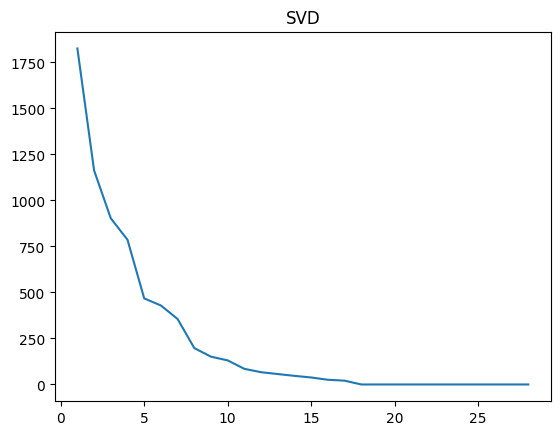

In [8]:
digit0 = df.iloc[1]
pixels = np.array(digit0).reshape(28,28)
u,s,vt=np.linalg.svd(pixels,full_matrices=False)
plt.plot(range (1, len(s)+1),s)
plt.title("SVD")
plt.show()

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

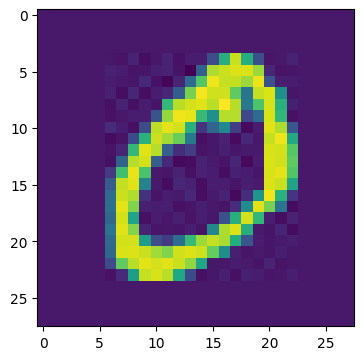

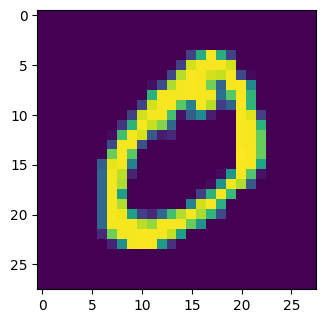

In [9]:
scopy = s.copy()
scopy[10:] = 0.0 

digit0_img = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(digit0_img)

#p#lt.subplot(1,2,2)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(pixels)

_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions. (10 points)

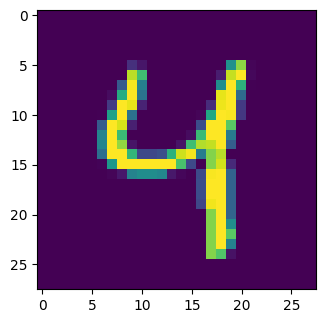

In [10]:
sample = df.sample(frac = 0.1)
digit = sample.iloc[1]
pixels = np.array(digit).reshape(28,28)
# u,s,vt=np.linalg.svd(df,full_matrices=False)
newscopy = s.copy()
newscopy[40:] = 0.0 

img = u.dot(np.diag(newscopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(pixels)

_ = plt.subplots_adjust(wspace=0.5)
plt.show()


I chose a higher rank because it shows a more focused image

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images. (10 points)

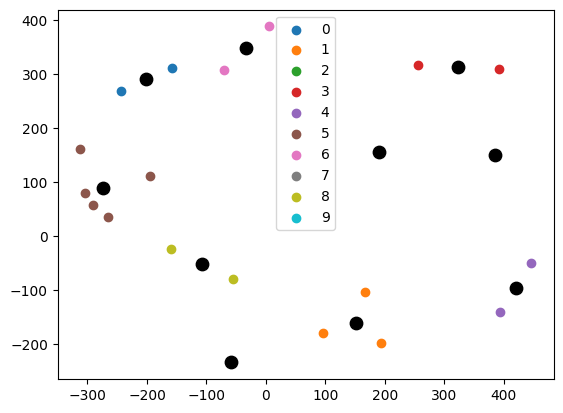

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

img = u.dot(np.diag(scopy)).dot(vt)
pca2 = PCA(2)
mn = pca2.fit_transform(img)
c = KMeans(n_clusters = 10, init = "k-means++",)
label = c.fit_predict(mn)
centroids2 = c.cluster_centers_

# filtered_label0 = mn[label == 0]


u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(mn[label == i , 0] , mn[label == i , 1] , label = i)
plt.scatter(centroids2[:,0] , centroids2[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()


f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe. (8 points)

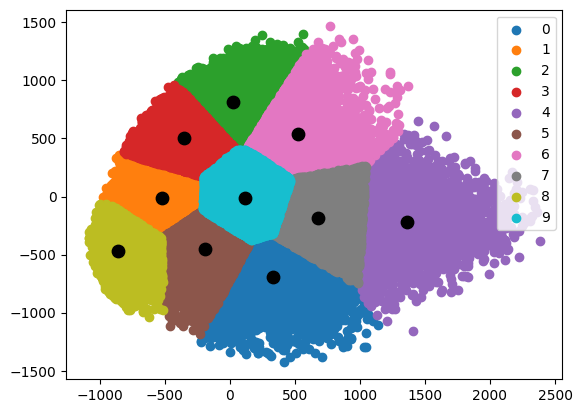

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

df = pd.DataFrame(X,y)
pca = PCA(2)
mn = pca.fit_transform(df)
cluster = KMeans(n_clusters = 10, init = "k-means++",)
label = cluster.fit_predict(mn)
centroids = cluster.cluster_centers_

filtered_label0 = df[label == 0]

 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(mn[label == i , 0] , mn[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()



g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [13]:
def disagreement_dist(P_labels, C_labels):
    disagreement_distance = 0

    length = len(C_labels)
    # kmeans_labels = kmeans.predict(reshaped_mnist)
    # attached_labels = mnist.target

    for i in range(length - 1):
        for j in range(i + 1, length):
            if (C_labels[i] == C_labels[j] and P_labels[i] != P_labels[j]) or (C_labels[i] != C_labels[j] and P_labels[i] == P_labels[j]):
                disagreement_distance += 1
            
    disagreement_distance

disagreement_dist()

TypeError: disagreement_dist() missing 2 required positional arguments: 'P_labels' and 'C_labels'

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [ ]:
newMatrix = [[[0]*len(img)]*len(img[0])]
for i in range(len(img)):
    for j in range(len(img[0])):
        newMatrix[i][j] = img[i][j] - digit0_img[i][j]
        

IndexError: list index out of range

i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

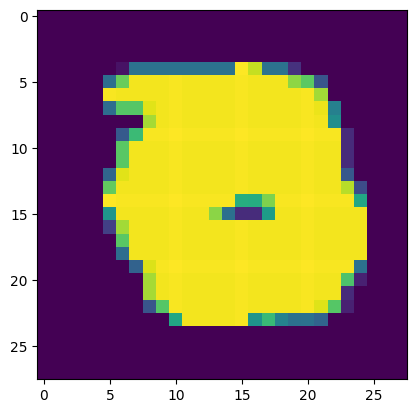

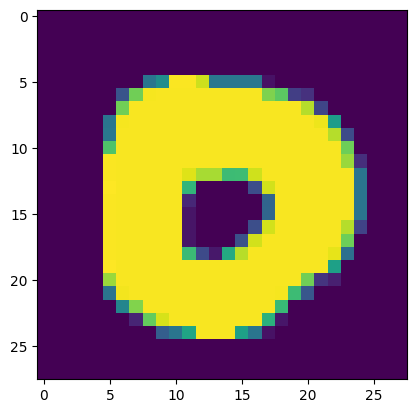

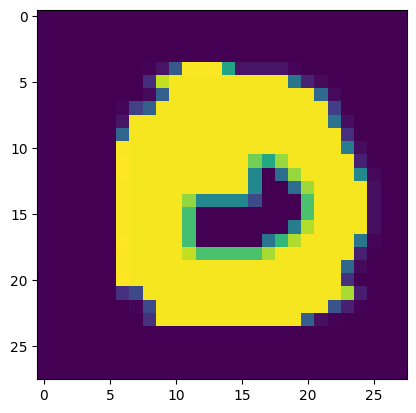

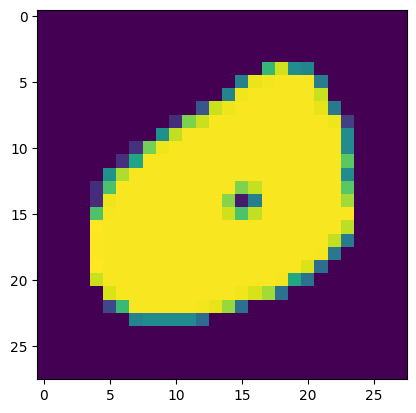

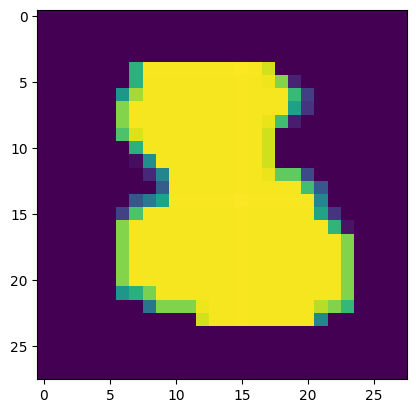

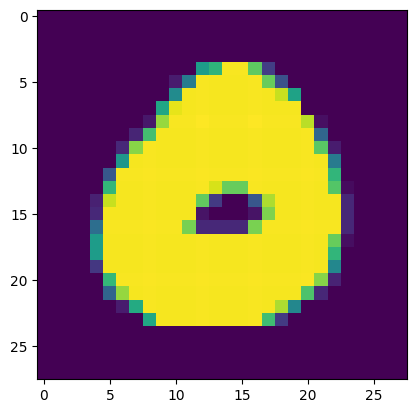

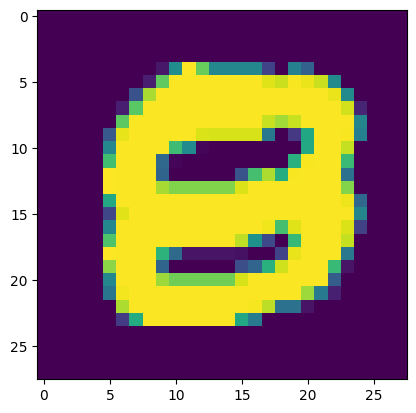

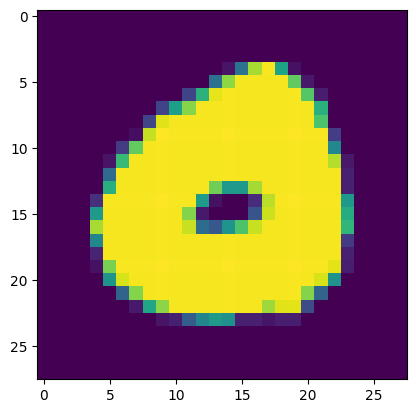

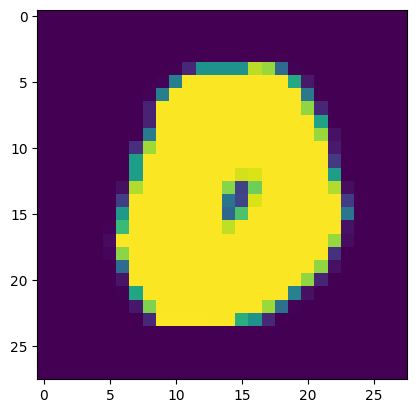

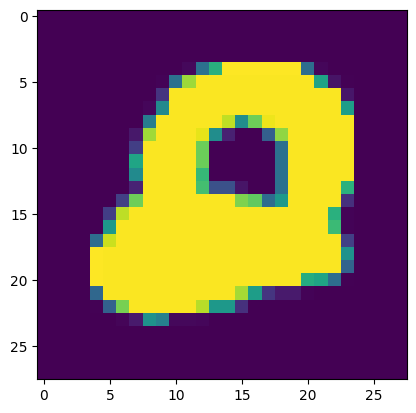

In [ ]:
df = pd.DataFrame (X)
df["distance"] = df.apply (lambda x: np. linalg.norm(x), axis=1)
for index, data in df.nlargest (10, 'distance'). iterrows():
    img = np.array (data[:-1]).reshape (28,28)
    plt.imshow(img)
    plt.show()

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware'] # your categories here
news_data = fetch_20newsgroups(subset='train', categories=categories)
# news_data

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [15]:
stem = SnowballStemmer(language = "english")
stemed = []
for i in range(len(news_data.data)):
    stems = stem.stem(news_data.data[i])
    stemed.append(stems)
    news_data.data[i] = stems 


c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [16]:
vec = TfidfVectorizer(max_df = .20, min_df = .2)
vec = vec.fit_transform(news_data)
vec_df= pd.DataFrame(X,y)
vec_df.to_csv('vec.csv')


d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

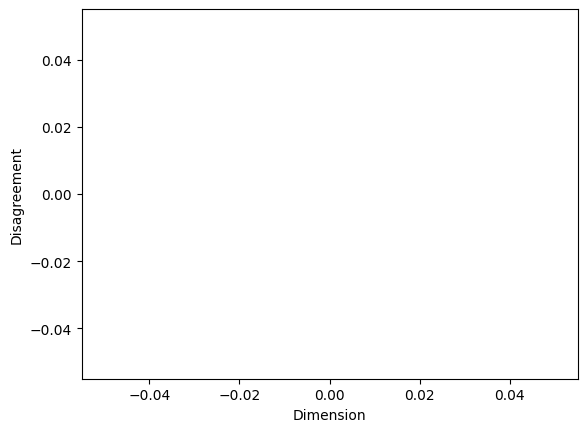

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
disagreement_distance = []
pca = PCA(n_components=4)
for k in range(1,25):
    dim_reduced_dataset = TfidfVectorizer (max_df=.55, min_df=.5) .fit_transform(news_data.data)
    kmeans = KMeans(n_clusters= 4, init= "k-means++")
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist (labelsk, news_data.target))
plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension') 
plt.show()